In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

def set_parameters(initial_population, birth_rate=None, death_rate=None, max_time=100, carrying_capacity=500, max_population=None):
    if birth_rate is None:
        birth_rate = random.uniform(0.1, 0.5)
    if death_rate is None:
        death_rate = random.uniform(0.1, 0.5)

    return {
        'initial_population': initial_population,
        'birth_rate': birth_rate,
        'death_rate': death_rate,
        'max_time': max_time,
        'carrying_capacity': carrying_capacity,
        'max_population': max_population
    }

def run_simulation(params):
    time = 0
    population = params['initial_population']
    max_population = params['max_population']
    carrying_capacity = params['carrying_capacity']

    time_points = [time]
    population_sizes = [population]

    while time < params['max_time'] and population > 0:
        effective_birth_rate = params['birth_rate'] * (1 - population / carrying_capacity)
        birth_rate_total = effective_birth_rate * population
        death_rate_total = params['death_rate'] * population
        total_rate = birth_rate_total + death_rate_total

        if total_rate == 0:
            break

        time_to_next_event = np.random.exponential(1 / total_rate)

        if random.uniform(0, 1) < birth_rate_total / total_rate:
            population += 1
        else:
            population -= 1

        time += time_to_next_event

        if max_population and population > max_population:
            break

        time_points.append(time)
        population_sizes.append(population)

    return time_points, population_sizes

def run_multiple_simulations(params, num_simulations):
    all_time_points = []
    all_population_sizes = []

    for _ in range(num_simulations):
        time_points, population_sizes = run_simulation(params)
        all_time_points.append(time_points)
        all_population_sizes.append(population_sizes)

    max_time = params['max_time']
    num_points = 1000  # Number of points for interpolation
    average_time_points = np.linspace(0, max_time, num_points)
    interpolated_populations = np.zeros((num_simulations, num_points))

    for i in range(num_simulations):
        interpolated_populations[i] = np.interp(average_time_points, all_time_points[i], all_population_sizes[i])

    average_population_sizes = np.mean(interpolated_populations, axis=0)

    return average_time_points, average_population_sizes

def plot_results(time_points, population_sizes, average_time_points=None, average_population_sizes=None):
    plt.figure(figsize=(10, 6))
    plt.plot(time_points, population_sizes, label='Population Size')

    if average_time_points is not None and average_population_sizes is not None:
        plt.plot(average_time_points, average_population_sizes, label='Average Population Size', linestyle='--')

    plt.xlabel('Time')
    plt.ylabel('Population Size')
    plt.title('Population Size over Time')
    plt.legend()
    plt.show()




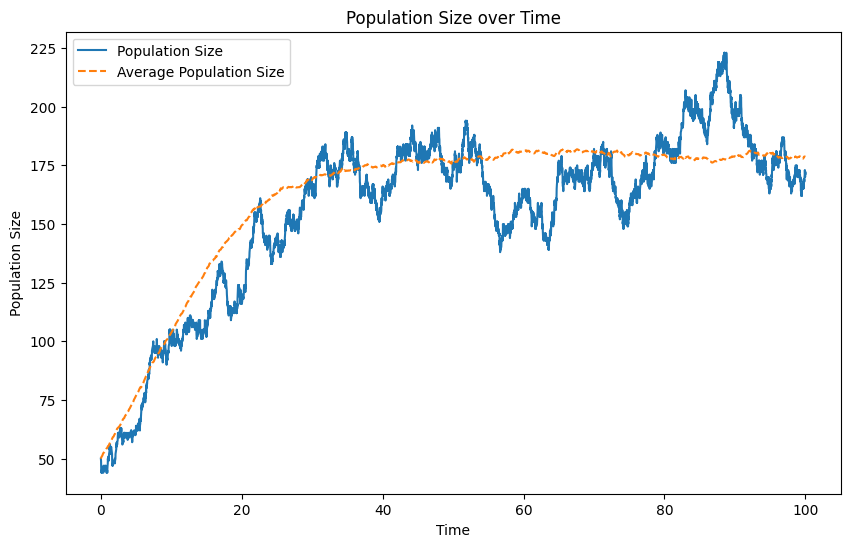

In [2]:
# Example usage
params = set_parameters(initial_population=50)
time_points, population_sizes = run_simulation(params)
average_time_points, average_population_sizes = run_multiple_simulations(params, num_simulations=100)
plot_results(time_points, population_sizes, average_time_points, average_population_sizes)
